In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.font_manager import FontProperties

In [3]:
# 读取数据
selling_wuqing = pd.read_csv("Housing Price Data in Wuqing.csv")
rental_wuqing = pd.read_csv("Housing Rent Data in Wuqing.csv")
selling_balitai = pd.read_csv("selling_data_八里台.csv")
rental_balitai = pd.read_csv("rental_data_八里台.csv")
selling_zhongxin = pd.read_csv("zhongxin_selling.csv")
rental_zhongxin = pd.read_csv("zhongxin_rental.csv")
selling_heping = pd.read_csv("price_data_heping_output20.csv")
rental_heping = pd.read_csv("rent_data_heping_output20.csv")

In [4]:
# 统一售价表格的列名
selling_wuqing.columns = ['面积', '总价', '单价']
selling_balitai.columns = ['面积', '总价', '单价',]
selling_zhongxin.columns = ['面积', '总价', '单价']
selling_heping.columns = ['面积', '总价', '单价', '地区']

# 统一租金表格的列名
rental_wuqing.columns = ['面积', '租金']
rental_balitai.columns = ['面积', '租金']
rental_zhongxin.columns = ['面积', '租金']
rental_heping.columns = ['面积', '租金', '地区']

# 为没有地区标识的数据集添加地区标识
selling_wuqing['地区'] = '武清'
rental_wuqing['地区'] = '武清'
selling_balitai['地区'] = '八里台'
rental_balitai['地区'] = '八里台'
selling_zhongxin['地区'] = '中新生态城'
rental_zhongxin['地区'] = '中新生态城'

# 合并所有数据集
selling_total = pd.concat([selling_wuqing, selling_balitai, selling_zhongxin, selling_heping])
rental_total = pd.concat([rental_wuqing, rental_balitai, rental_zhongxin, rental_heping])

In [5]:
# 数据描述
print("二手房数据描述：")
print(selling_total.describe())

print("\n租房数据描述：")
print(rental_total.describe())

二手房数据描述：
                面积           总价             单价
count  5025.000000  5025.000000    5025.000000
mean    104.386876   245.725588   27973.762189
std      57.397224   218.346667   21900.539466
min       4.800000    17.000000    4190.000000
25%      70.280000   110.000000   12168.000000
50%      98.900000   177.000000   19006.000000
75%     129.000000   310.000000   38820.000000
max     673.850000  2450.000000  139915.000000

租房数据描述：
                面积            租金
count  1145.000000   1145.000000
mean     99.806114   3923.822707
std      57.104883   4636.015628
min      10.000000    500.000000
25%      71.000000   1800.000000
50%      90.000000   2800.000000
75%     117.000000   4300.000000
max     633.000000  55000.000000


In [6]:
# 使用IQR方法检测数据的异常值
def outliers_detector(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [7]:
# 检测二手房数据的异常值
area_outliers = outliers_detector(selling_total, '面积')
Tprice_outliers = outliers_detector(selling_total, '总价')
price_outliers = outliers_detector(selling_total, '单价')

# 检测租房数据的异常值
area_rental_outliers = outliers_detector(rental_total, '面积')
price_rental_outliers = outliers_detector(rental_total, '租金')

In [8]:
print(f"二手房面积的异常值数量为：{len(area_outliers)}")
print(f"二手房总价的异常值数量为：{len(Tprice_outliers)}")
print(f"二手房单价的异常值数量为：{len(price_outliers)}")
print(f"租房面积的异常值数量为：{len(area_rental_outliers)}")
print(f"租房租金的异常值数量为：{len(price_rental_outliers)}")

二手房面积的异常值数量为：201
二手房总价的异常值数量为：236
二手房单价的异常值数量为：163
租房面积的异常值数量为：55
租房租金的异常值数量为：85


In [9]:
# 为租房数据集计算每平米租金的数据
rental_wuqing['每平米租金'] =  rental_wuqing['租金'] / rental_wuqing['面积']
rental_balitai['每平米租金'] =  rental_balitai['租金'] / rental_balitai['面积']
rental_zhongxin['每平米租金'] =  rental_zhongxin['租金'] / rental_zhongxin['面积']
rental_heping['每平米租金'] =  rental_heping['租金'] / rental_heping['面积']

selling_total = pd.concat([selling_wuqing, selling_balitai, selling_zhongxin, selling_heping])
rental_total = pd.concat([rental_wuqing, rental_balitai, rental_zhongxin, rental_heping])

In [10]:
median_price_per_sqm = selling_total.groupby('地区')['单价'].median()
median_rent_per_sqm = rental_total.groupby('地区')['每平米租金'].median()

# 计算租售比
price_to_rent_ratio = median_price_per_sqm / (median_rent_per_sqm)

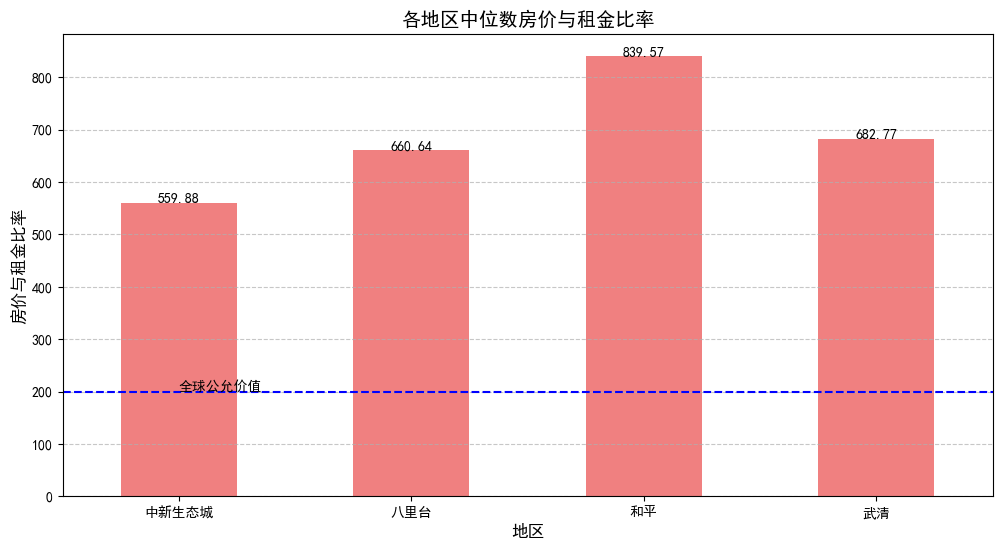

In [25]:
# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['font.family'] = ['SimHei', 'Times New Roman']  
plt.rcParams['axes.unicode_minus'] = False  

# Figure A
plt.figure(figsize = (12, 6))
ax = price_to_rent_ratio.plot(kind = 'bar', color = 'lightcoral')
plt.title('各地区中位数房价与租金比率', fontsize=14)
plt.xlabel('地区', fontsize = 12)
plt.ylabel('房价与租金比率', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# 在柱状图上显示数值
for i, v in enumerate(price_to_rent_ratio):
    ax.text(i, v + 0.1, f'{v:.2f}', ha = 'center', fontsize=10)

# 添加表示全球公允价值的虚线
plt.axhline(y=200, color='b', linestyle='--', label='全球公允价值')
plt.text(0, 200 + 2, '全球公允价值', fontsize=10, color='k')

plt.xticks(rotation=0) 
plt.show()

In [14]:
def model_fit_predict(selling_data, rental_data, block, m2_values):
    try:
        # 筛选特定地区的数据
        block_selling = selling_data[selling_data['地区'] == block].copy()
        block_rental = rental_data[rental_data['地区'] == block].copy()

        # 创建变量 location
        block_selling['location'] = 1
        block_rental['location'] = 1

        # 创建交互项
        block_selling['m2_x_location'] = block_selling['面积'] * block_selling['location']
        block_rental['m2_x_location'] = block_rental['面积'] * block_rental['location']

        # Model 1: 拟合房价模型
        X_selling = block_selling[['面积', 'location', 'm2_x_location']]
        X_selling = sm.add_constant(X_selling)
        y_selling = block_selling['单价']

        model_selling = sm.OLS(y_selling, X_selling).fit()
        selling_params = model_selling.params

        # Model 2: 拟合租金模型
        X_rental = block_rental[['面积', 'location', 'm2_x_location']]
        X_rental = sm.add_constant(X_rental)
        y_rental = block_rental['每平米租金']

        model_rental = sm.OLS(y_rental, X_rental).fit()
        rental_params = model_rental.params

        # 预测不同面积的房价和租金
        results = {}
        for m2 in m2_values:
            # 预测每平方米房价
            pred_price_per_sqm = (
                selling_params.get('const', 0) +
                selling_params.get('面积', 0) * m2 +
                selling_params.get('location', 0) +
                selling_params.get('m2_x_location', 0) * m2
            )

            # 预测总房价
            pred_total_price = pred_price_per_sqm * m2

            # 预测每平方米租金
            pred_rent_per_sqm = (
                rental_params.get('const', 0) +
                rental_params.get('面积', 0) * m2 +
                rental_params.get('location', 0) +
                rental_params.get('m2_x_location', 0) * m2
            )

            # 预测租金
            pred_rent = pred_rent_per_sqm * m2

            # 计算价格与租金比率
            price_to_rent = pred_total_price / (pred_rent)

            results[m2] = {
                'price_per_sqm': pred_price_per_sqm,
                'total_price': pred_total_price,
                'rent_per_sqm': pred_rent_per_sqm,
                'rent': pred_rent,
                'price_to_rent_ratio': price_to_rent
            }

        return results
    except KeyError as e:
        print(f"数据框中缺少必要的列: {e}")
        return None
    except Exception as e:
        print(f"发生未知错误: {e}")
        return None

In [15]:
# 导入我们需要的函数参数
blocks = ['武清', '八里台', '中新生态城', '和平']
m2_values = [50, 100]
predictions = {}

In [16]:
for block in blocks:
    predictions[block] = model_fit_predict(selling_total, rental_total, block, m2_values)

price_to_rent_50 = {block: predictions[block][50]['price_to_rent_ratio'] for block in blocks}
price_to_rent_100 = {block: predictions[block][100]['price_to_rent_ratio'] for block in blocks}

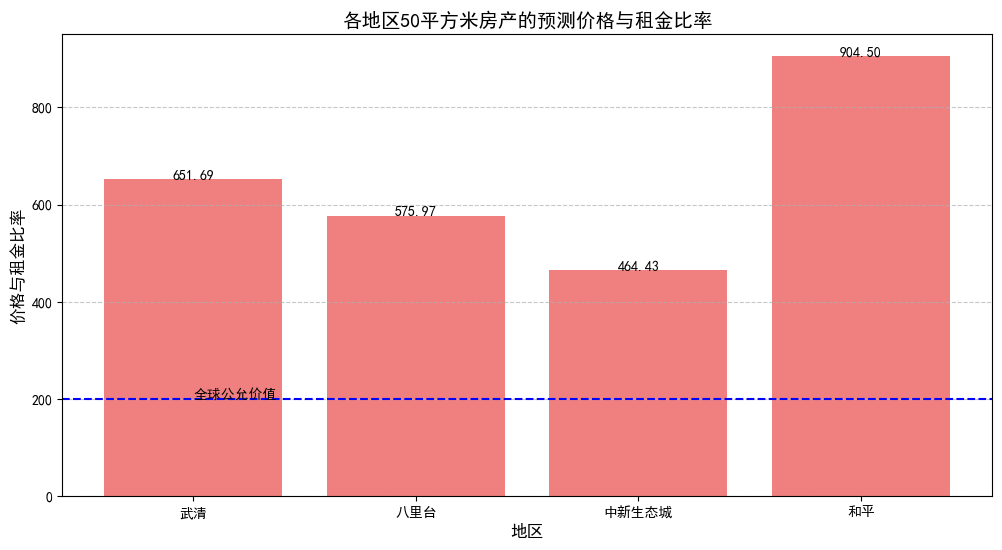

In [26]:
# Bar Plot for Figure B (m2=50)
plt.figure(figsize = (12, 6))
ax = plt.bar(price_to_rent_50.keys(), price_to_rent_50.values(), color = 'lightcoral')
plt.title('各地区50平方米房产的预测价格与租金比率', fontsize = 14)
plt.xlabel('地区', fontsize = 12)
plt.ylabel('价格与租金比率', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# 在柱状图上显示数值
for i, (block, ratio) in enumerate(price_to_rent_50.items()):
    plt.text(i, ratio + 0.1, f'{ratio:.2f}', ha = 'center', fontsize=10)

# 添加表示全球公允价值的虚线
plt.axhline(y=200, color='b', linestyle='--', label='全球公允价值')
plt.text(0, 200 + 2, '全球公允价值', fontsize=10, color='k')

plt.show()

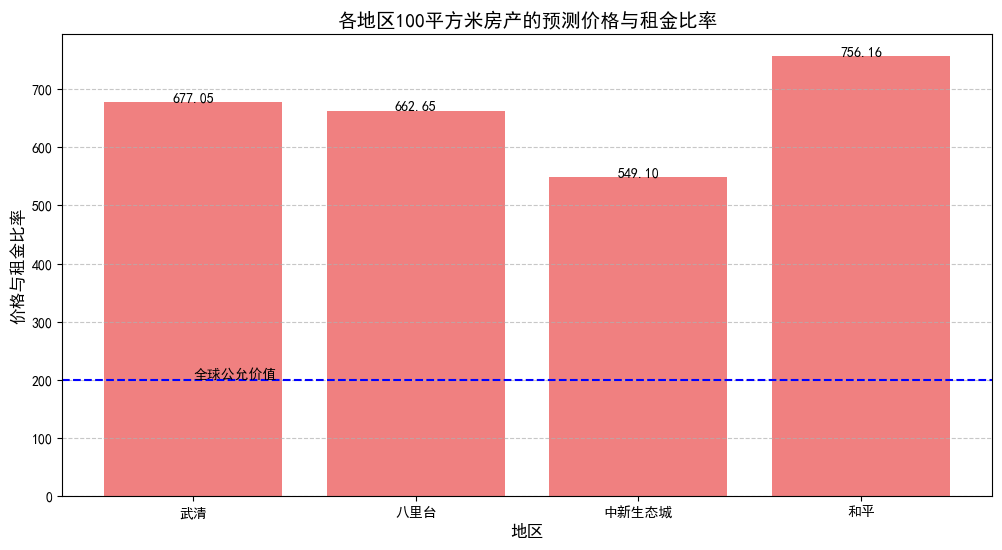

In [27]:
# Bar Plot for Figure C (m2=100)
plt.figure(figsize = (12, 6))
ax = plt.bar(price_to_rent_100.keys(), price_to_rent_100.values(), color = 'lightcoral')
plt.title('各地区100平方米房产的预测价格与租金比率', fontsize = 14)
plt.xlabel('地区', fontsize = 12)
plt.ylabel('价格与租金比率', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# 在柱状图上显示数值
for i, (block, ratio) in enumerate(price_to_rent_100.items()):
    plt.text(i, ratio + 0.1, f'{ratio:.2f}', ha = 'center', fontsize = 10)

# 添加表示全球公允价值的虚线
plt.axhline(y=200, color='b', linestyle='--', label='全球公允价值')
plt.text(0, 200 + 2, '全球公允价值', fontsize=10, color='k')

plt.show()